## Clustering-Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Step1:Load a dataset

In [2]:
# Load Dataset (UCI Wine Dataset)
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

### Step2:Preprocessing Methods

In [3]:
# Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:

# PCA for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

Step 3:Clustering Algorithms

In [5]:
# Clustering Algorithms
clusters = [3, 4, 5]
results = []

In [8]:

for c in clusters:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=c, random_state=42, n_init=10)
    labels_kmeans = kmeans.fit_predict(df_scaled)

    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=c)
    labels_hierarchical = hierarchical.fit_predict(df_scaled)

    # Mean-Shift Clustering
    meanshift = MeanShift()
    labels_meanshift = meanshift.fit_predict(df_scaled)

    # Evaluation Metrics
    for method, labels in zip(["K-Means", "Hierarchical", "Mean-Shift"],
                              [labels_kmeans, labels_hierarchical, labels_meanshift]):
        silhouette = silhouette_score(df_scaled, labels)
        calinski = calinski_harabasz_score(df_scaled, labels)
        davies = davies_bouldin_score(df_scaled, labels)

        results.append([method, c, silhouette, calinski, davies])


In [10]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Method", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
print(results_df)

         Method  Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0       K-Means         3    0.284859          70.940008        1.389188
1  Hierarchical         3    0.277444          67.647468        1.418592
2    Mean-Shift         3    0.224476           6.435434        1.320059
3       K-Means         4    0.260170          56.181355        1.796892
4  Hierarchical         4    0.225837          51.464146        1.788651
5    Mean-Shift         4    0.224476           6.435434        1.320059
6       K-Means         5    0.201619          46.952209        1.808319
7  Hierarchical         5    0.186742          43.679272        1.922855
8    Mean-Shift         5    0.224476           6.435434        1.320059


###Step 4:Visualize PCA with K-Means

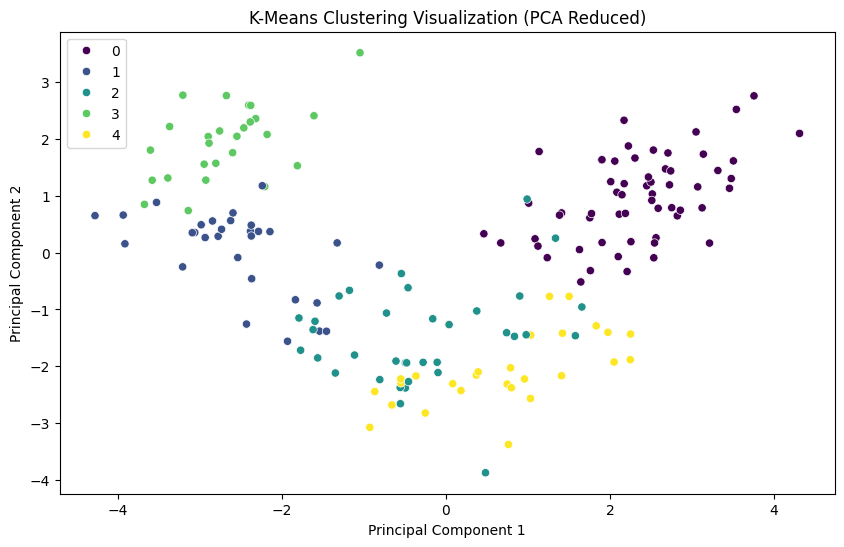

In [11]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_kmeans, palette='viridis')
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Dendogram

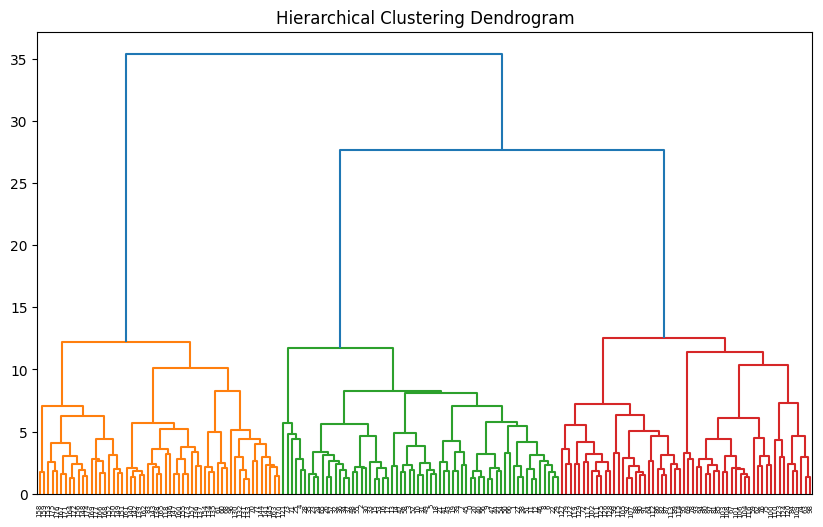

In [12]:

# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
linked = linkage(df_scaled, method='ward')
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


### cluster distribution

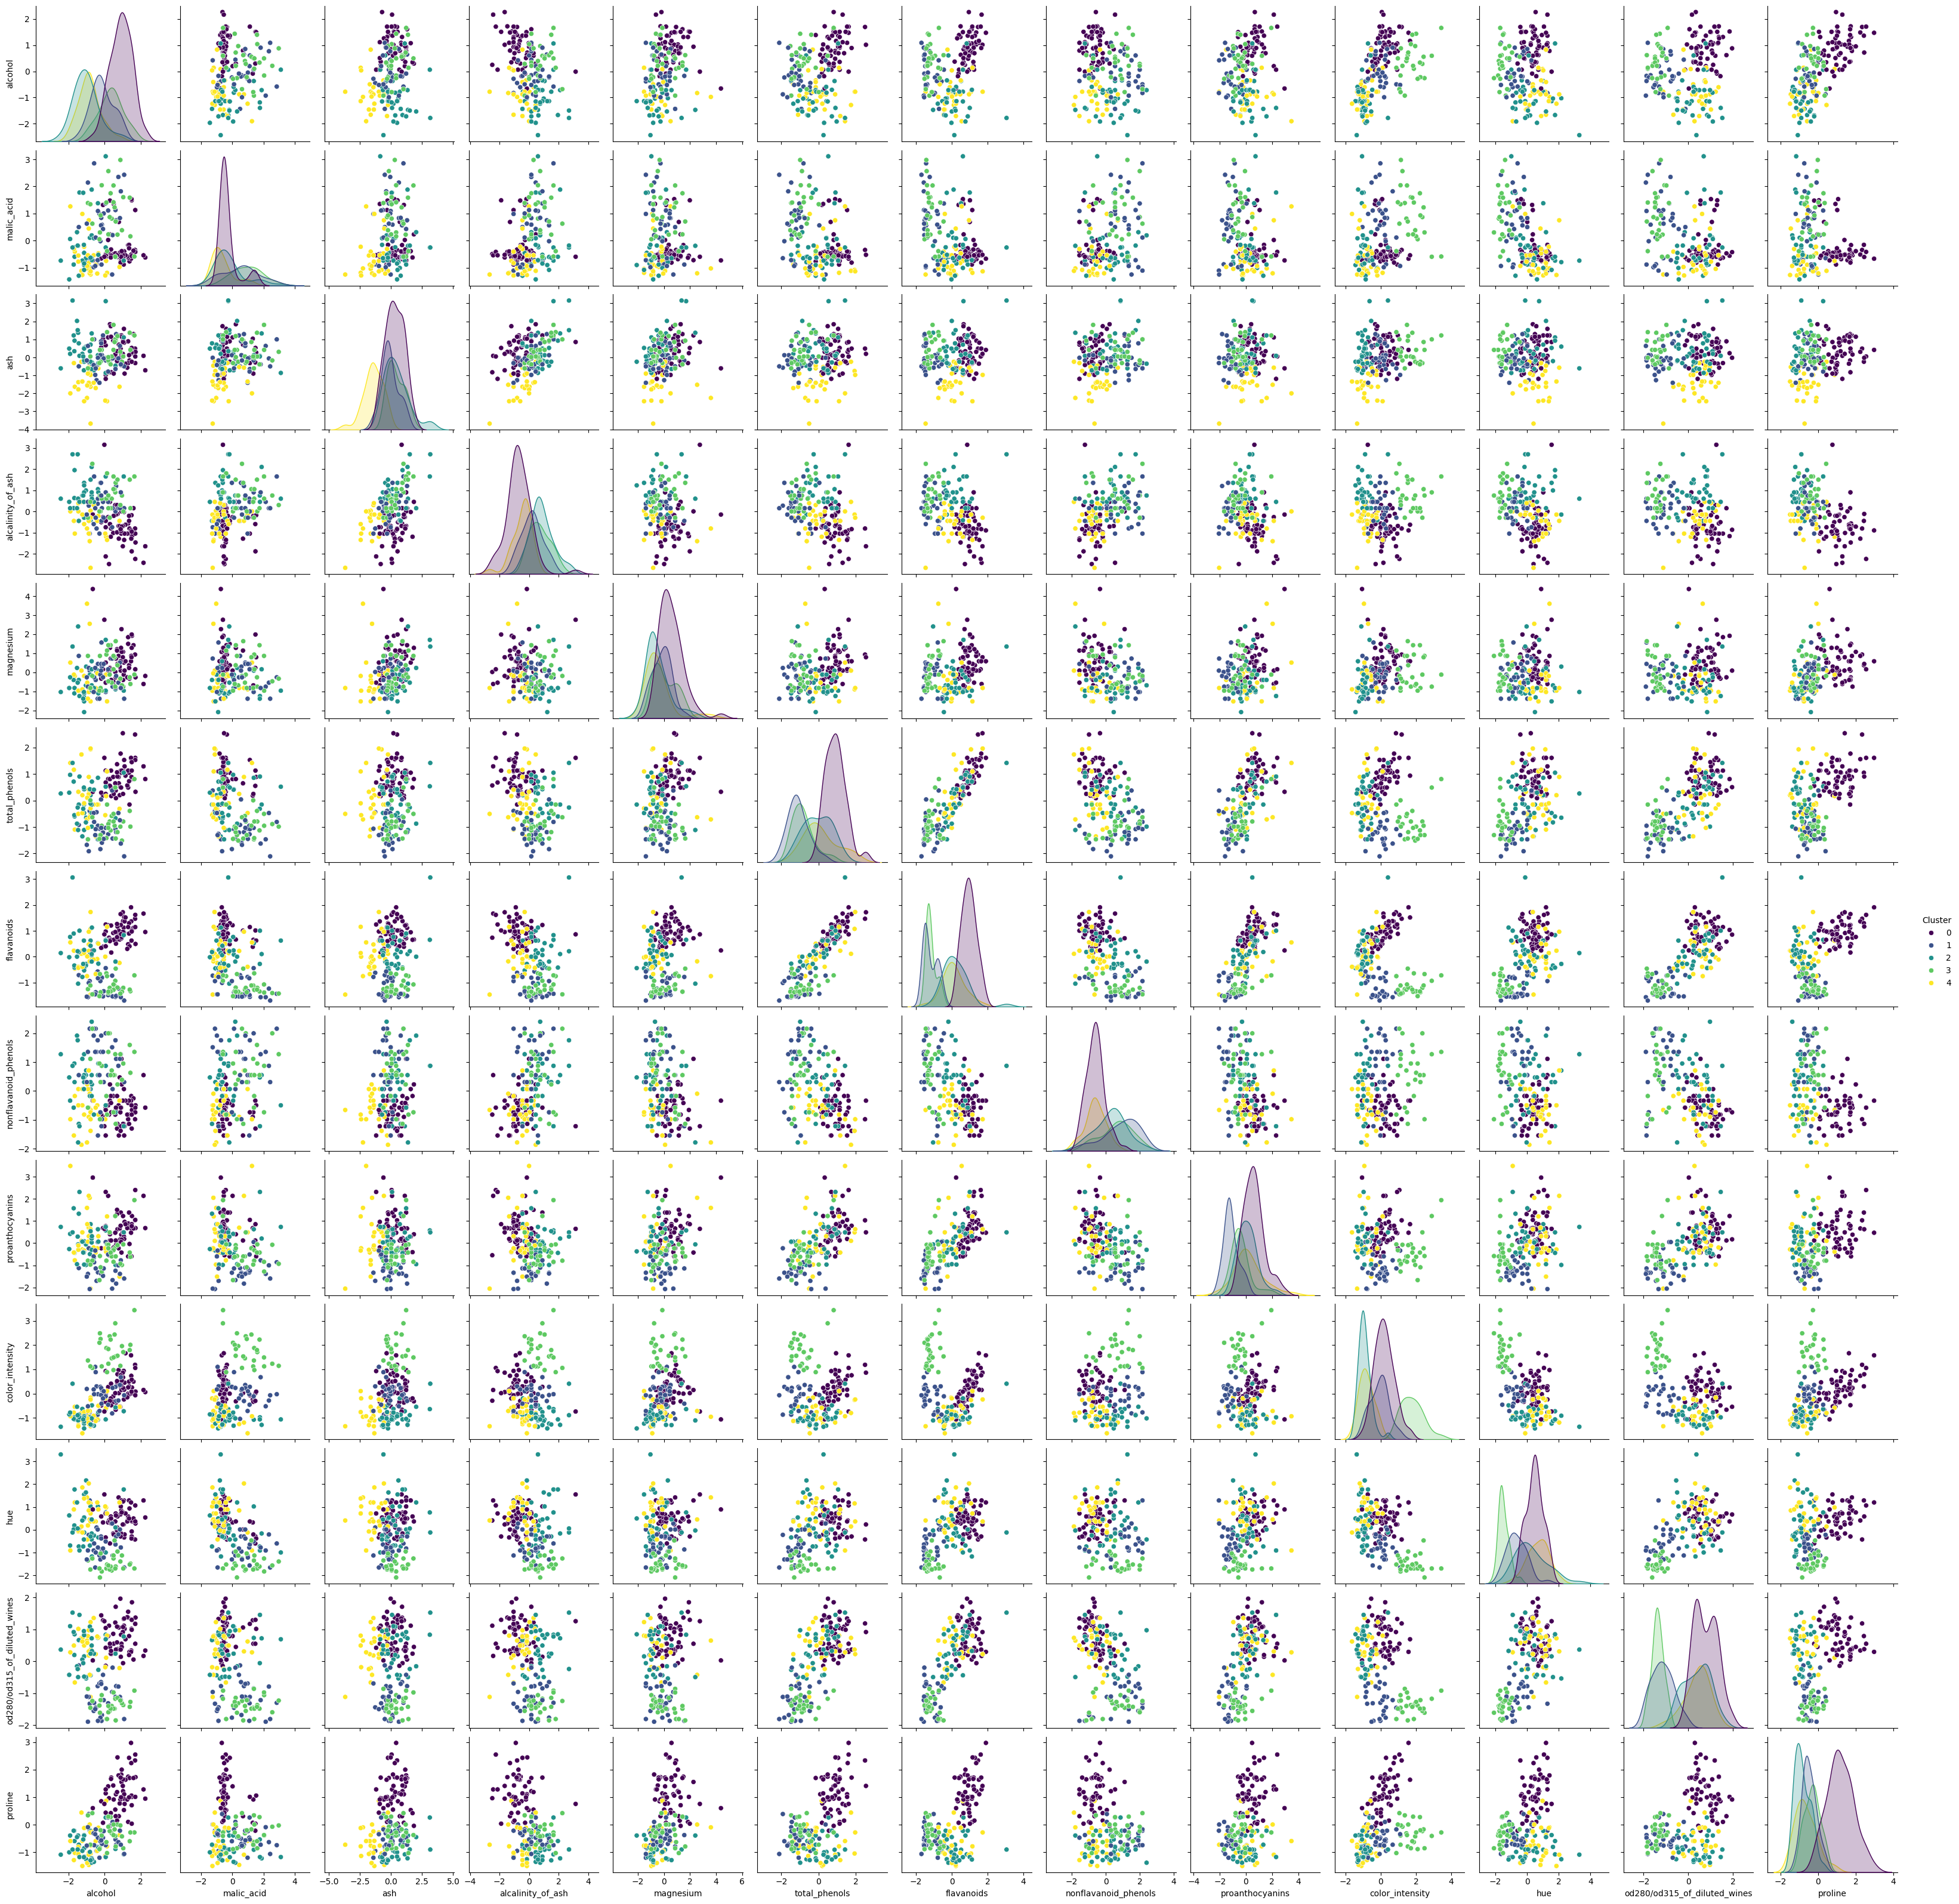

In [13]:
# Pairplot to visualize cluster distribution
sns.pairplot(pd.DataFrame(df_scaled, columns=data.feature_names).assign(Cluster=labels_kmeans), hue="Cluster", palette="viridis")
plt.show()


### Heatmap

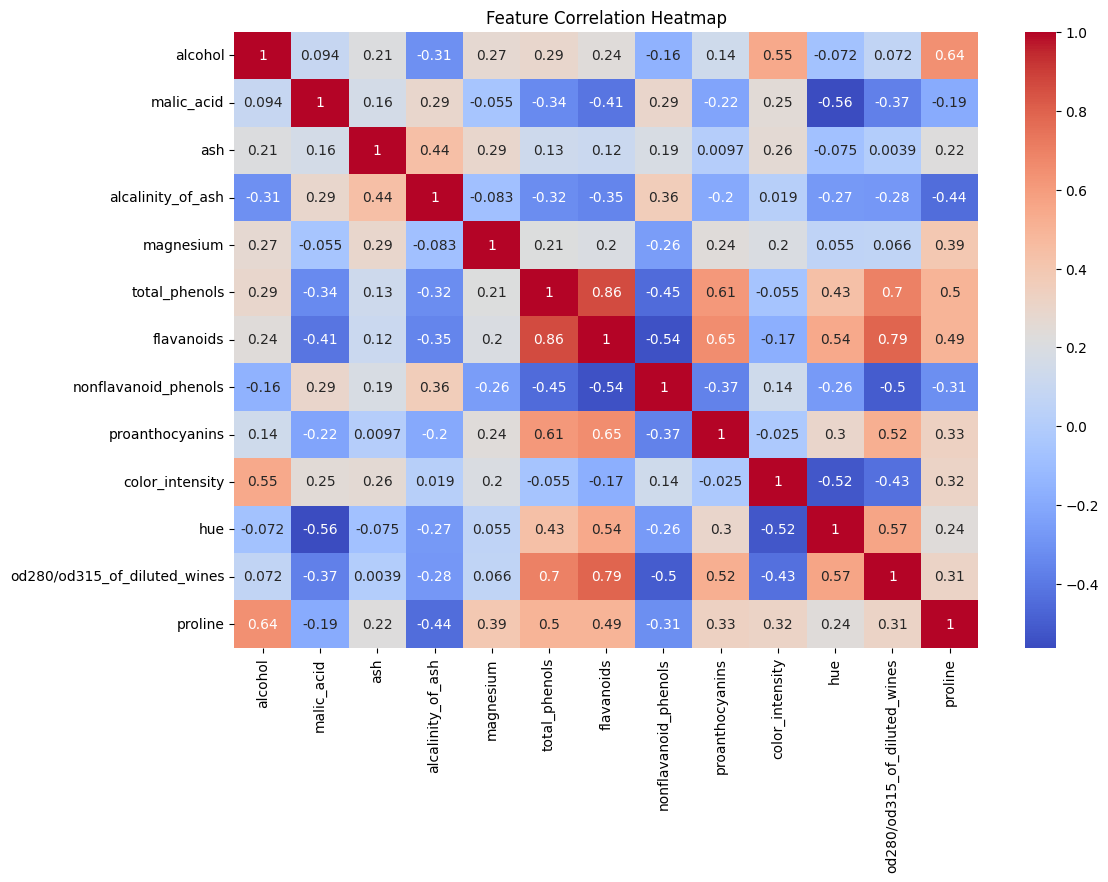

In [14]:
# Heatmap to visualize feature correlations in clusters
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(df_scaled, columns=data.feature_names).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Elbow method

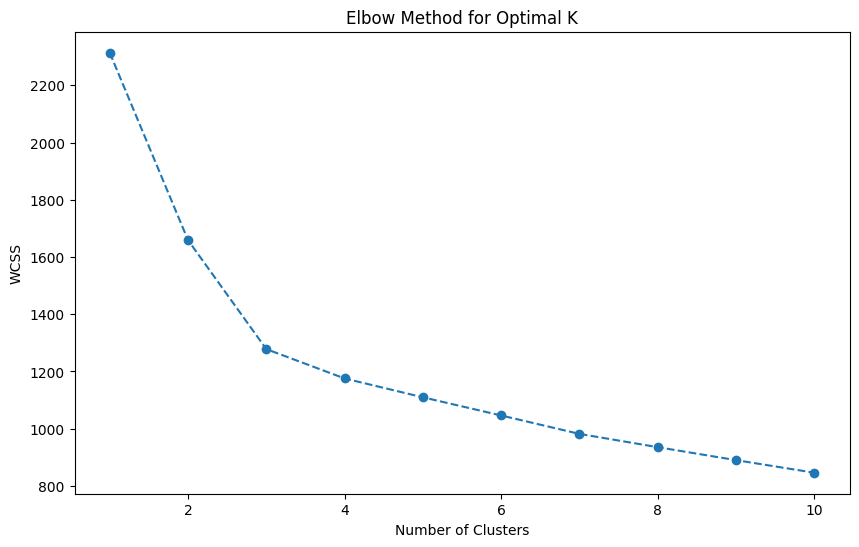

In [16]:
# Elbow Method for Optimal K selection
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [17]:
# Save results to CSV for GitHub upload
results_df.to_csv("clustering_results.csv", index=False)